## 🗺️ Generación de Curvas de Nivel en 2D y 3D con Python
Este script genera curvas de nivel a partir de datos topográficos almacenados en un archivo CSV. Se muestran visualizaciones tanto en 2D como en 3D.

### 📥 Importación de librerías necesarias



In [17]:
import pandas as pd
import matplotlib.pyplot as plt

### 📄 Carga de datos

In [2]:
data = pd.read_csv("curva 2.0.csv", header=None)
data.head()

,0,1,2,3,4,5,6
0,NaN,25.0,20.0,15.0,10.0,5.0,0.0
1,25.0,849.2,854.5,859.3,862.2,863.3,862.8
2,20.0,848.5,854.0,858.4,858.7,858.1,857.9
3,15.0,847.6,855.6,858.0,855.2,851.0,849.5
4,10.0,848.4,854.3,856.7,854.5,848.7,838.3


### 🔢 Extracción de coordenadas y valores de altura

In [3]:
x = data.iloc[0, 1:] # Coordenadas X (encabezado de columnas, desde la segunda)
y = data.iloc[1:, 0] # Coordenadas Y (primera columna, desde la segunda fila)
px_values = data.iloc[1:, 1:] # Matriz de alturas

### 🎚️ Niveles de curva
Lista de valores de altura que se usarán como niveles para las curvas.

In [13]:
levels = [844, 846, 848, 850, 852, 854, 856, 858, 860, 862]

### 🖼️ Gráfico 2D de curvas de nivel

Text(0.5, 1.0, 'Curva de nivel')

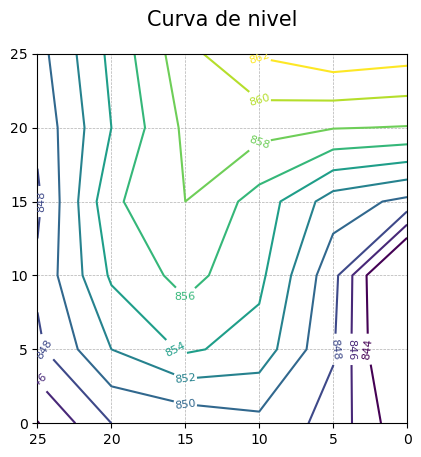

In [19]:
fig, ax = plt.subplots()

CS = ax.contour(x, y, px_values, levels=levels)
ax.clabel(CS, inline=True, fontsize=8)
ax.invert_xaxis() # Invierte el eje X para representar la orientación correcta del terreno
ax.set_aspect('equal') # Igual proporción en los ejes X e Y
ax.grid(linestyle='--', linewidth=0.5)
plt.title("Curva de nivel", fontsize= 15, fontweight='light',pad=20)

### 🌐 Gráfico 3D de la superficie

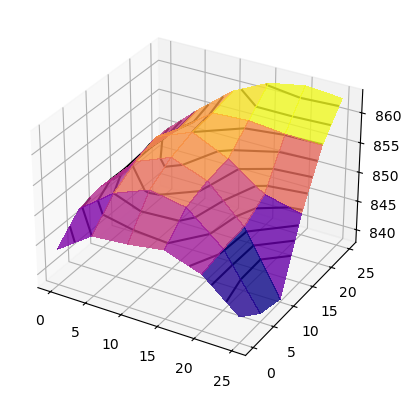

In [16]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import numpy as np

X, Y = np.meshgrid(x[::-1], y)

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.contour(x[::-1], y, px_values, levels=levels, colors="k")
ax2.plot_surface(X, Y, px_values,cmap=cm.plasma,linewidth=0,antialiased=False,alpha=0.8)